Libraries

In [20]:
import networkx as nx
from math import e

ModuleNotFoundError: No module named 'networkx'

1 (вариант 5)

In [ ]:
def qZ(x,y):
    return (x - 3 * y + 1) / (3 * x ** 2 + y ** 2 + 1)
def qSumZ(Z):
    return sum(Z)
def exchangeScheme(oldX,oldY, sortedId):
    X=[0 for i in range(4)]
    Y=[0 for i in range(4)]
    X[2] = oldX[sortedId[2]]
    X[3] = oldX[sortedId[2]]
    X[0] = oldX[sortedId[0]]
    X[1] = oldX[sortedId[1]]
    Y[0] = oldY[sortedId[2]]
    Y[1] = oldY[sortedId[2]]   
    Y[2] = oldY[sortedId[0]]
    Y[3] = oldY[sortedId[1]]
    return X,Y
def sorting(Z):
    sortedId=sorted(range(len(Z)), key=lambda k:Z[k])
    return sortedId
def evostep(X,Y,Z):
    _, minId = min((value,id) for (id,value) in enumerate(Z))
    X=X[:]
    Y=Y[:]
    Z=Z[:]
    X.pop(minId)
    Y.pop(minId)
    Z.pop(minId)
    return X,Y,Z
def evosteps(X,Y, stepsnum=4):
    results=[]
    for i in range(4):
        arrZ=[qZ(x,Y[i]) for i, x in enumerate(X)]
        X,Y,Z=evostep(X,Y,arrZ)
        X,Y=exchangeScheme(X,Y,sorting(Z))
        results.append([X,Y,qSumZ(arrZ),arrZ])
    return X,Y,results
X = [-2,-1,0,2]
Y = [-2,0,-1,1]
results=evosteps(X,Y)
qualityArrZ = []
for i in range(len(results[2])):
    qualityArrZ += results[2][i][3]
    print(f'max_{i+1}_step: {qualityArrZ[i]}')
print('max Z:', max(qualityArrZ), sep='\t')

max_1_step: 0.2222222222222222
max_2_step: -2.5
max_3_step: 0.0
max_4_step: 0.36363636363636365
max Z:	0.6666666666666666


2 (вариант 1)

In [3]:
distances = [(1, 2, 26),
             (1, 3, 42),
             (1, 4, 44),
             (1, 5, 31),
             (1, 6, 24),
             (2, 3, 20),
             (2, 4, 34),
             (2, 5, 40),
             (2, 6, 15),
             (3, 4, 23),
             (3, 5, 43),
             (3, 6, 20),
             (4, 5, 27),
             (4, 6, 22),
             (5, 6, 26)]
V = [1, 2, 3, 4, 5, 6, 1]
Z = [(3, 4),
     (4, 6),
     (5, 6),
     (6, 2)]
P = [90, 45, 43, 31]
T=100
def probability(delta, T):
    return 100 * e ** (-delta / T)
def reductTemp(prevT):
    nextT = 0.5 * prevT
    return nextT
def edgeLength(i, j, distances, roundTrip=True):
    if roundTrip:
        return max([(item[2] if (item[0] == i and item[1] == j) or (item[1] == i and item[0] == j) else -1)
                    for item in distances])
    else:
        return max([(item[2] if (item[0] == i and item[1] == j) else -1) for item in distances])
def routeLength(V, distances):
    edges = []
    for i in range(len(V) - 1):
        edges.append(edgeLength(V[i], V[i + 1], distances))
    return sum(edges)
def routeOneReplacement(arrV, Z, replacementByName=True):
    decrement = 1 if replacementByName else 0
    arrV[Z[0] - decrement], arrV[Z[1] - decrement] = arrV[Z[1] - decrement], arrV[Z[0] - decrement]
    return arrV
def routeReplacement(V, Z):
    for z in Z:
        V = routeOneReplacement(V, z)
    return V
def chooseRoute(distances, V, Z, T, P):
    sumLength = routeLength(V, distances)
    arrSum = [sumLength]
    for i in range(len(Z)):
        newV = routeOneReplacement(V[:], Z[i])
        newS = routeLength(newV, distances)
        arrSum.append(newS)
        deltaS = newS - sumLength
        if deltaS > 0:
            p = probability(deltaS, T)
            if p > P[i]:
                V = newV
                sumLength = newS
        else:
            V = newV
            sumLength = newS
        T = reductTemp(T)
    return V, arrSum
def drawRouteGraph(distances, bestRoute):
    newDistances = []
    for i in range(len(bestRoute) - 1):
        for distance in distances:
            if distance[0] == bestRoute[i] and distance[1] == bestRoute[i + 1] or distance[1] == bestRoute[i] and distance[0] == bestRoute[i + 1]:
                newDistances.append(distance)
    graph = nx.Graph()
    graph.add_weighted_edges_from(newDistances)
    nx.draw_kamada_kawai(graph, node_color='#fb7258', node_size=2000, with_labels=True)
bestRoute, arrLength = chooseRoute(distances, V, Z, T, P)
print(f'Лучший выбранный маршрут: {bestRoute}')
print(f'Длина лучшего выбранного маршрута: {routeLength(bestRoute, distances)}')
print(f'Длины всех рассмотренных маршрутов: {arrLength}')
drawRouteGraph(distances, bestRoute)

NameError: name 'e' is not defined

3

Лучший выбранный маршрут: [1, 5, 3, 6, 4, 2, 1]
Длина лучшего выбранного маршрута: 176
Длины всех рассмотренных маршрутов: [146, 176, 163, 146, 176]


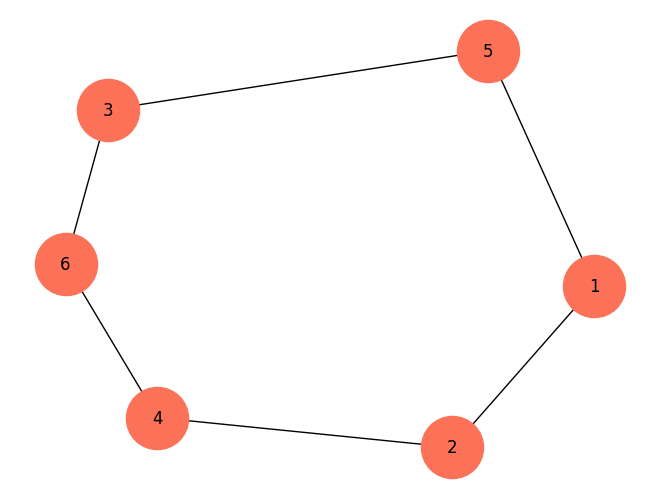

In [2]:
distances = [(1, 2, 26),
             (1, 3, 42),
             (1, 4, 44),
             (1, 5, 31),
             (1, 6, 24),
             (2, 3, 20),
             (2, 4, 34),
             (2, 5, 40),
             (2, 6, 15),
             (3, 4, 23),
             (3, 5, 43),
             (3, 6, 20),
             (4, 5, 27),
             (4, 6, 22),
             (5, 6, 26)]
V = [1, 2, 3, 4, 5, 6, 1]
Z = [(3, 4),
     (4, 6),
     (5, 6),
     (6, 2)]
P = [90, 45, 43, 31]
T=100
def probability(delta, T):
    return 100 * e ** (-delta / T)
def reductTemp(prevT):
    nextT = 0.75 * prevT
    return nextT
def edgeLength(i, j, distances, roundTrip=True):
    if roundTrip:
        return max([(item[2] if (item[0] == i and item[1] == j) or (item[1] == i and item[0] == j) else -1)
                    for item in distances])
    else:
        return max([(item[2] if (item[0] == i and item[1] == j) else -1) for item in distances])
def routeLength(V, distances):
    edges = []
    for i in range(len(V) - 1):
        edges.append(edgeLength(V[i], V[i + 1], distances))
    return sum(edges)
def routeOneReplacement(arrV, Z, replacementByName=True):
    decrement = 1 if replacementByName else 0
    arrV[Z[0] - decrement], arrV[Z[1] - decrement] = arrV[Z[1] - decrement], arrV[Z[0] - decrement]
    return arrV
def routeReplacement(V, Z):
    for z in Z:
        V = routeOneReplacement(V, z)
    return V
def chooseRoute(distances, V, Z, T, P):
    sumLength = routeLength(V, distances)
    arrSum = [sumLength]
    for i in range(len(Z)):
        newV = routeOneReplacement(V[:], Z[i])
        newS = routeLength(newV, distances)
        arrSum.append(newS)
        deltaS = newS - sumLength
        if deltaS > 0:
            p = probability(deltaS, T)
            if p > P[i]:
                V = newV
                sumLength = newS
        else:
            V = newV
            sumLength = newS
        T = reductTemp(T)
    return V, arrSum
def drawRouteGraph(distances, bestRoute):
    newDistances = []
    for i in range(len(bestRoute) - 1):
        for distance in distances:
            if distance[0] == bestRoute[i] and distance[1] == bestRoute[i + 1] or distance[1] == bestRoute[i] and distance[0] == bestRoute[i + 1]:
                newDistances.append(distance)
    graph = nx.Graph()
    graph.add_weighted_edges_from(newDistances)
    nx.draw_kamada_kawai(graph, node_color='#fb7258', node_size=2000, with_labels=True)
bestRoute, arrLength = chooseRoute(distances, V, Z, T, P)
print(f'Лучший выбранный маршрут: {bestRoute}')
print(f'Длина лучшего выбранного маршрута: {routeLength(bestRoute, distances)}')
print(f'Длины всех рассмотренных маршрутов: {arrLength}')
drawRouteGraph(distances, bestRoute)